In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
num = 10000
N = 12
T=1

In [35]:
def gen_stockprices(S0 = 50, sigma = 0.2, T=1/N, mu = 0.1):
    S1 = S0*np.exp((mu - 0.5*sigma**2) * T + (sigma*np.sqrt(T)*np.random.normal(loc=0,scale=1)))
    return S1


In [36]:
prices = np.zeros((num,N+1))
for i in range(num):
    prices[i][0] = 50
    for j in range(N+1):
        if j == 0:
            continue
        prices[i][j] = gen_stockprices(S0 = prices[i][j-1])
prices[0]


array([50.        , 50.77314287, 46.11272345, 40.67851738, 43.77593007,
       39.96487786, 41.075567  , 36.50702588, 35.71060832, 38.69213219,
       35.68495799, 34.37329007, 36.49396791])

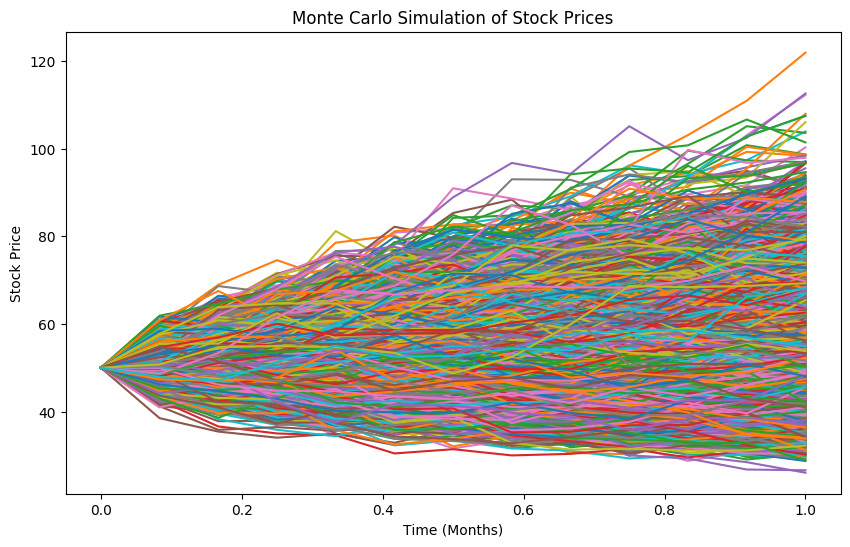

In [37]:
t = np.linspace(0,T,N+1)
# print(t.shape)
# print(prices[0].shape)
plt.figure(figsize=(10, 6))
for i in range(num):
    plt.plot(t,prices[i])
plt.title('Monte Carlo Simulation of Stock Prices')
plt.xlabel('Time (Months)')
plt.ylabel('Stock Price')
plt.show()

The mean and standard deviation for the stock prices data is the initial price and monthly volatility. 

In [39]:
payoff = np.zeros((num,))
barrier = 5
strike = 70
for i in range(num):
    knocked_down = False
    for j in range(N+1):
        if prices[i][j] < barrier:
            knocked_down = True
            payoff[i] = 0
            break
    if knocked_down is False:
        payoff[i] = max(0,strike-prices[i][N])

price_option = np.average(payoff)*np.exp(-.1)
print("option price:", price_option)

option price: 14.094515494892358
